<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

##–í—ã–±–æ—Ä –∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ ```Regressions datasets``` –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º (–æ —Å–º–µ–Ω–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ - –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ)

In [527]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [528]:
import pandas as pd
df = pd.read_excel('Real estate valuation data set.xlsx')
df

X1_transaction_date  X2_house_age  \
0            2012.916667          32.0   
1            2012.916667          19.5   
2            2013.583333          13.3   
3            2013.500000          13.3   
4            2012.833333           5.0   
..                   ...           ...   
409          2013.000000          13.7   
410          2012.666667           5.6   
411          2013.250000          18.8   
412          2013.000000           8.1   
413          2013.500000           6.5   

     X3_distance_to_the_nearest_MRT_station  X4_number_of convenience_stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5_latitude  X6_longitude  Y_house_price_of_unit_area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 7 columns]

In [529]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

1. –í—ã–±—Ä–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é Y (Y - —á–∏—Å–ª–æ–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
2. –° –ø–æ–º–æ—â—å—é EDA (—Å–º –ø—Ä–∞–∫—Ç–∏–∫–∞) –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ Y (–º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≥–∞—Ä—Ñ–∏—á–µ—Å–∫–∏, –º–æ–∂–Ω–æ —á–∏—Å–ª–∞–º–∏).
3. –û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ (—Ç—É—Ç –≤–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ - –Ω–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã —ç—Ç–æ –ø–ª–æ—Ö–æ)
4. –û–±–æ—Å–Ω–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –∫–ª–∞—Å—Å–∞–º, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)

P.S. –í–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ, —Å–ª–∏—à–∫–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∏–º–µ–Ω–∞ –ª—é–¥–µ–π, –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥, ID —é–∑–µ—Ä–∞ –∏–ª–∏ —á–µ–≥–æ-—Ç–æ –µ—â–µ - –Ω–µ –±–µ—Ä–µ–º, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∞ –µ—Å–ª–∏ –∏ –≤–ª–∏—è–µ—Ç, —Ç–æ —ç—Ç–æ —Å–ª—É—á–∞–π–Ω–æ)

In [530]:
# –ü—Ä–∏–º–µ—Ä —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É
X = df
y = df.Y_house_price_of_unit_area # —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
X = X.drop('Y_house_price_of_unit_area', axis=1) # –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 331 —Å—Ç—Ä–æ–∫–∞ –Ω–∞ –æ—É–±—á–µ–Ω–∏–µ –∏ 83 —Å—Ç—Ä–æ–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é

(192     42.7
 234     23.9
 5       32.1
 45      38.3
 245     40.8
        ...  
 71      40.8
 106     47.1
 270    117.5
 348     53.7
 102     54.4
 Name: Y_house_price_of_unit_area, Length: 331, dtype: float64,
 358    45.1
 350    42.3
 373    52.2
 399    37.3
 369    22.8
        ... 
 31     25.0
 283    23.5
 157    35.6
 203    46.1
 208    26.2
 Name: Y_house_price_of_unit_area, Length: 83, dtype: float64)

### –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

(OneHotEncode –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

(Standard or MinMax or –±–∏–Ω–∏–Ω–≥ –∏–ª–∏ –¥—Ä—É–≥–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö)

P.S. –¶–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å


In [531]:
df['X4_number_of convenience_stores'] = df['X4_number_of convenience_stores'].astype('category')

In [532]:
df = df.drop('X1_transaction_date', axis=1)

In [533]:
df

X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

    X4_number_of convenience_stores  X5_latitude  X6_longitude  \
0                                10     24.98298     121.54024   
1                                 9     24.98034     121.53951   
2                                 5     24.98746     121.54391   
3                                 5     24.98746     121.54391   
4                                 5     24.97937     121.54245   
..                              ...          ...           ...   
409                               0     24.94155     121.50381   
410                               9     24.97433     121.54310   
411                               7     24.97923     121.53986   
412                               5     24.96674     121.54067   
413                               9     24.97433     121.54310   

     Y_house_price_of_unit_area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

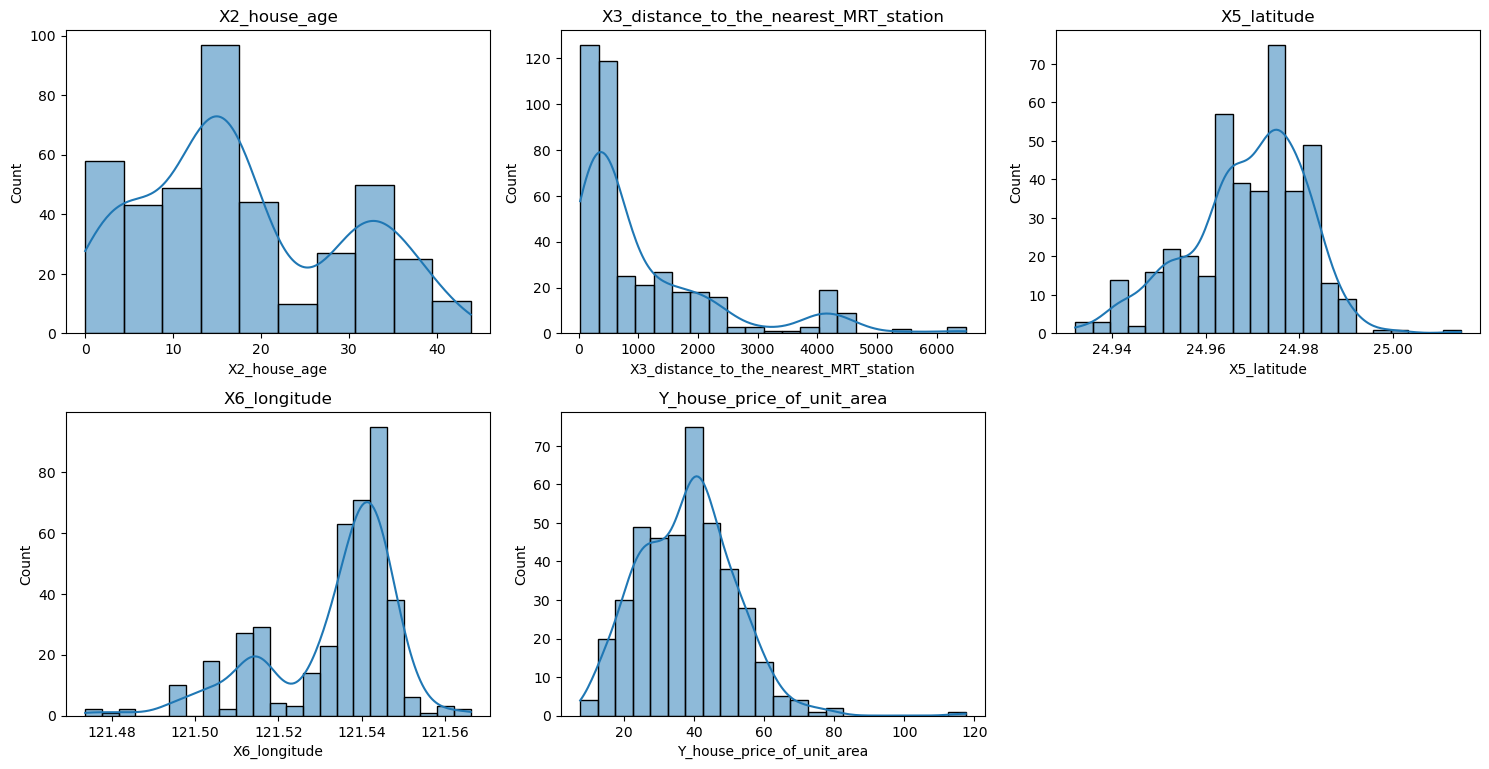

In [534]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [535]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4_number_of convenience_stores')

plt.show()

<Axes: >

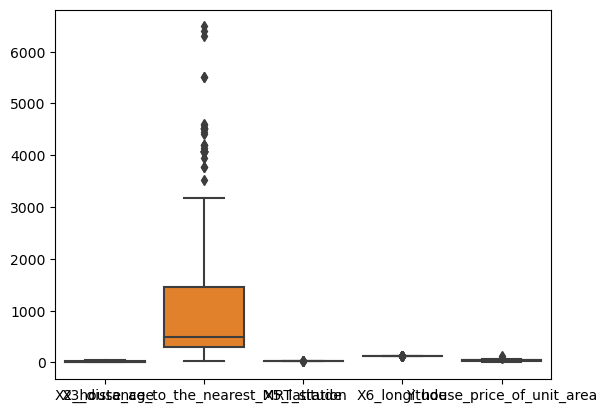

In [536]:
sns.boxplot(data=df)


<Axes: >

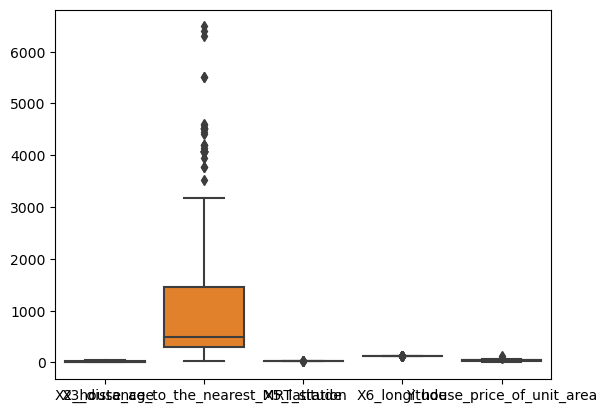

In [537]:
sns.boxplot(data=df)


In [538]:
df.columns

Index(['X2_house_age', 'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area'],
      dtype='object')

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X2_house_age                            414 non-null    float64 
 1   X3_distance_to_the_nearest_MRT_station  414 non-null    float64 
 2   X4_number_of convenience_stores         414 non-null    category
 3   X5_latitude                             414 non-null    float64 
 4   X6_longitude                            414 non-null    float64 
 5   Y_house_price_of_unit_area              414 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 17.1 KB


In [540]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# def transform_dataframe(df):
#     required_columns = ['X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']
#     # –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–ø–∏–∏ DataFrame, —á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π df
#     df_transformed = df.copy()

#     # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–µ—Ä–≤—ã—Ö —á–µ—Ç—ã—Ä–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é StandardScaler
#     scaler = StandardScaler()
#     scaled_features = scaler.fit_transform(df_transformed[required_columns[:]])

#     # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'ph_bins' —Å –ø–æ–º–æ—â—å—é pd.get_dummies
#     age_bins_dummies = pd.get_dummies(df_transformed['X2_house_age'], prefix='age')
#     number_of_convenience_stores_bins_dummies = pd.get_dummies(df_transformed['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
#     # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
#     df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:])
#     df_transformed = pd.concat([df_transformed, age_bins_dummies], axis=1)
#     df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)
#     return df_transformed

# df_research = transform_dataframe(df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of convenience_stores', 'X5_latitude', 'X6_longitude']])
# df_research = pd.concat([df_research, df['Y_house_price_of_unit_area'], ], axis=1)
    

In [541]:
from sklearn.preprocessing import StandardScaler
"""
–ö–æ–¥ –∑–¥–µ—Å—å
"""

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude']])
number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4_number_of convenience_stores'], prefix='number_of convenience_stores')
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df_transformed = pd.DataFrame(scaled_features, columns=['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X5_latitude', 'X6_longitude'])
df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

df_y = df['Y_house_price_of_unit_area'].reset_index()
df_itog = pd.concat([df_transformed,df_y['Y_house_price_of_unit_area'] , ], axis=1)
df_itog

X2_house_age  X3_distance_to_the_nearest_MRT_station  X5_latitude  \
0        1.255628                               -0.792495     1.125430   
1        0.157086                               -0.616612     0.912444   
2       -0.387791                               -0.414015     1.486860   
3       -0.387791                               -0.414015     1.486860   
4       -1.117223                               -0.549997     0.834188   
..            ...                                     ...          ...   
409     -0.352637                                2.378365    -2.216993   
410     -1.064493                               -0.788071     0.427579   
411      0.095568                               -0.549678     0.822893   
412     -0.844784                               -0.776684    -0.184755   
413     -0.985398                               -0.788071     0.427579   

     X6_longitude  number_of convenience_stores_0  \
0        0.448762                               0   
1        0.401139                               0   
2        0.688183                               0   
3        0.688183                               0   
4        0.592937                               0   
..            ...                             ...   
409     -1.927835                               1   
410      0.635341                               0   
411      0.423972                               0   
412      0.476814                               0   
413      0.635341                               0   

     number_of convenience_stores_1  number_of convenience_stores_2  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number_of convenience_stores_3  number_of convenience_stores_4  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number_of convenience_stores_5  number_of convenience_stores_6  \
0                                 0                               0   
1                                 0                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               1                            

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –Ω–∞—á–∞–ª–∞, —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ X –∏ Y

–†–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [542]:
df.describe()

X2_house_age  X3_distance_to_the_nearest_MRT_station  X5_latitude  \
count    414.000000                              414.000000   414.000000   
mean      17.712560                             1083.885689    24.969030   
std       11.392485                             1262.109595     0.012410   
min        0.000000                               23.382840    24.932070   
25%        9.025000                              289.324800    24.963000   
50%       16.100000                              492.231300    24.971100   
75%       28.150000                             1454.279000    24.977455   
max       43.800000                             6488.021000    25.014590   

       X6_longitude  Y_house_price_of_unit_area  
count    414.000000                  414.000000  
mean     121.533361                   37.980193  
std        0.015347                   13.606488  
min      121.473530                    7.600000  
25%      121.528085                   27.700000  
50%      121.538630                   38.450000  
75%      121.543305                   46.600000  
max      121.566270                  117.500000

In [543]:
df

X2_house_age  X3_distance_to_the_nearest_MRT_station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

    X4_number_of convenience_stores  X5_latitude  X6_longitude  \
0                                10     24.98298     121.54024   
1                                 9     24.98034     121.53951   
2                                 5     24.98746     121.54391   
3                                 5     24.98746     121.54391   
4                                 5     24.97937     121.54245   
..                              ...          ...           ...   
409                               0     24.94155     121.50381   
410                               9     24.97433     121.54310   
411                               7     24.97923     121.53986   
412                               5     24.96674     121.54067   
413                               9     24.97433     121.54310   

     Y_house_price_of_unit_area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

In [544]:
df_research.describe()

X3_distance_to_the_nearest_MRT_station   X5_latitude  X6_longitude  \
count                            4.100000e+02  4.100000e+02  4.100000e+02   
mean                             1.473076e-16  4.837106e-13 -1.038614e-12   
std                              9.549767e-01  9.549767e-01  9.549767e-01   
min                             -1.049274e+00 -2.250416e+00 -2.534385e+00   
25%                             -6.714966e-01 -6.059797e-01 -2.268064e-01   
50%                             -3.832630e-01  4.837120e-13  1.707130e-01   
75%                              3.219353e-01  6.323859e-01  5.937058e-01   
max                              3.422460e+00  3.021454e+00  2.649679e+00   

            age_1       age_2       age_3       age_4       age_5  \
count  410.000000  410.000000  410.000000  410.000000  410.000000   
mean     0.308311    0.396783    0.136729    0.155496    0.002681   
std      0.441004    0.467203    0.328093    0.346061    0.049380   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       number_of convenience_stores_0  number_of convenience_stores_1  \
count                      410.000000                      410.000000   
mean                         0.104558                        0.099196   
std                          0.292206                        0.285466   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       number_of convenience_stores_2  number_of convenience_stores_3  \
count                      410.000000                      410.000000   
mean                         0.064343                        0.123324   
std                          0.234316                        0.314005   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       number_of convenience_stores_4  number_of convenience_stores_5  \
count                       410.00000                      410.000000   
mean                          0.08311                        0.174263   
std                           0.26362                        0.362256   
min                           0.00000                        0.000000   
25%                           0.00000                        0.000000   
50%                           0.00000                        0.000000   
75%                           0.00000                        0.000000   
max                           1.00000                        1.000000   

       number_of convenience_stores_6  number_of convenience_stores_7  \
count                      410.000000                       410.00000   
mean                         0.099196                         0.08311   
std                          0.285466                         0.26362   
min                          0.000000                         0.00000   
25%                          0.000000                         0.00000   
50%                          0.000000                         0.00000   
75%                          0.000000                         0.00000   
max                          1.000000                         1.00000   

       number_of convenience_stores_8  number_of convenienc

In [545]:
df_research

X3_distance_to_the_nearest_MRT_station   X5_latitude  X6_longitude  \
0                             -9.619171e-01  1.190608e+00  3.231066e-01   
1                             -6.469643e-01  9.245958e-01  2.578589e-01   
2                             -2.841769e-01  1.642022e+00  6.511327e-01   
3                             -2.841769e-01  1.642022e+00  6.511327e-01   
4                             -5.276776e-01  8.268566e-01  5.206373e-01   
..                                      ...           ...           ...   
408                            1.476329e-16  4.837120e-13 -1.038612e-12   
410                            1.476329e-16  4.837120e-13 -1.038612e-12   
411                            1.476329e-16  4.837120e-13 -1.038612e-12   
412                            1.476329e-16  4.837120e-13 -1.038612e-12   
413                            1.476329e-16  4.837120e-13 -1.038612e-12   

     age_1  age_2  age_3  age_4  age_5  number_of convenience_stores_0  \
0      0.0    0.0    1.0    0.0    0.0                             0.0   
1      0.0    1.0    0.0    0.0    0.0                             0.0   
2      0.0    1.0    0.0    0.0    0.0                             0.0   
3      0.0    1.0    0.0    0.0    0.0                             0.0   
4      1.0    0.0    0.0    0.0    0.0                             0.0   
..     ...    ...    ...    ...    ...                             ...   
408    0.0    1.0    0.0    0.0    0.0                             0.0   
410    1.0    0.0    0.0    0.0    0.0                             0.0   
411    0.0    1.0    0.0    0.0    0.0                             0.0   
412    1.0    0.0    0.0    0.0    0.0                             0.0   
413    1.0    0.0    0.0    0.0    0.0                             0.0   

     number_of convenience_stores_1  number_of convenience_stores_2  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   
..                              ...                             ...   
408                             0.0                             0.0   
410                             0.0                             0.0   
411                             0.0                             0.0   
412                             0.0                             0.0   
413                             0.0                             0.0   

     number_of convenience_stores_3  number_of convenience_stores_4  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               0.0                             0.0   
3                               0.0                             0.0   
4                               0.0                             0.0   
..                              ...                             ...   
408                             1.0                             0.0   
410                             0.0                             0.0   
411                             0.0                             0.0   
412                             0.0                             0.0   
413                             0.0                             0.0   

     number_of convenience_stores_5  number_of convenience_stores_6  \
0                               0.0                             0.0   
1                               0.0                             0.0   
2                               1.0                             0.0   
3                               1.0                             0.0   
4                               1.0                             0.0   
..                              ...                             ...   
408         

In [546]:
y = df_itog['Y_house_price_of_unit_area']

In [547]:
X = df_itog.drop('Y_house_price_of_unit_area', axis=1)

In [548]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y_house_price_of_unit_area, Length: 414, dtype: float64

In [549]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# –í—ã–±–æ—Ä–∫–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': (1 - mape) * 100,
      'mape (original - % –æ—à–∏–±–æ–∫)': mape * 100,
  }


In [550]:
model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 5.846136159409673,
 'MSE': 78.25071875110132,
 'R2': 0.5839730463380597,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': 82.73649925615172,
 'mape (original - % –æ—à–∏–±–æ–∫)': 17.26350074384828}

In [551]:
model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)


{'MAE': 5.183936603211083,
 'MSE': 56.70773525326878,
 'R2': 0.6619705435565695,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': 83.82958040551873,
 'mape (original - % –æ—à–∏–±–æ–∫)': 16.170419594481274}

In [552]:
df_itog

X2_house_age  X3_distance_to_the_nearest_MRT_station  X5_latitude  \
0        1.255628                               -0.792495     1.125430   
1        0.157086                               -0.616612     0.912444   
2       -0.387791                               -0.414015     1.486860   
3       -0.387791                               -0.414015     1.486860   
4       -1.117223                               -0.549997     0.834188   
..            ...                                     ...          ...   
409     -0.352637                                2.378365    -2.216993   
410     -1.064493                               -0.788071     0.427579   
411      0.095568                               -0.549678     0.822893   
412     -0.844784                               -0.776684    -0.184755   
413     -0.985398                               -0.788071     0.427579   

     X6_longitude  number_of convenience_stores_0  \
0        0.448762                               0   
1        0.401139                               0   
2        0.688183                               0   
3        0.688183                               0   
4        0.592937                               0   
..            ...                             ...   
409     -1.927835                               1   
410      0.635341                               0   
411      0.423972                               0   
412      0.476814                               0   
413      0.635341                               0   

     number_of convenience_stores_1  number_of convenience_stores_2  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number_of convenience_stores_3  number_of convenience_stores_4  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number_of convenience_stores_5  number_of convenience_stores_6  \
0                                 0                               0   
1                                 0                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               1                            

### –û–±—É—á–µ–Ω–∏–µ
#### 1 –†–µ–≥—Ä–µ—Å—Å–∏—è
- –û–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2
- –í—ã–≤–µ—Å—Ç–∏ –∏ –Ω–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- –ù–∞–ø–∏—Å–∞—Ç—å —Ñ–æ—Ä–º—É–ª—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

#### 2 –ë–ª–∏–∂–∞–π—à–∏–µ —Å–æ—Å–µ–¥–∏
- –û–±—É—á–∏—Ç—å KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

In [553]:
"""
–ö–æ–¥ –∑–¥–µ—Å—å
"""

'\n–ö–æ–¥ –∑–¥–µ—Å—å\n'

##–ó–∞–¥–∞–Ω–∏–µ –¥–ª—è –≥–µ–Ω–∏–µ–≤*

–£–¥–∞—á–∏ üòà

–í –ø—Ä–∞–∫—Ç–∏–∫–µ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä—ã —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ ```linear_regression``` –∏ ```knn_regressor```, –Ω–æ –µ—Å—Ç—å –Ω—é–∞–Ω—Å... –°–µ–π—á–∞—Å –Ω–∏ linear_regression, –Ω–∏ knn_regressor –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ - —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞ LinearRegression –∏ KNNRegression (–ø—Ä–∏–º–µ—Ä—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–∫ –µ—Å—Ç—å). –í —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –æ–±—è–∑–∞—Ç–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–≤–∞ –º–µ—Ç–æ–¥–∞
```
.fit(X: np.array, y: np.array) -> None - –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–æ–¥–µ–ª–∏
.predict(X) -> np.array - –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å y –Ω–∞ –æ—Å–Ω–æ–≤–µ X
```
–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∞ - –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –≤ –º–æ–º–µ–Ω—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å KNN –∏ LinearRegression –∏–∑ sklearn, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã –≤–∞—à–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞–±–æ—Ç—ã –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ sklearn

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã —Å–¥–µ–ª–∞—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç–µ–º–∏ –∂–µ –¥–∞–Ω–Ω—ã–º–∏ –≤ sklearn

In [554]:
"""
–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã
"""

'\n–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã\n'